# Result Analysis

####  测试日期

2018-05-24

#### 相关模型：

+  DSSM
+  TFIDF
+  TOPIC

#### 原始匹配语料库： 

全量问题 + 全部同义句

#### 测试数据

@晓梅 给到samples.xls的数据中的100个银行相关问题 + 1条非银行相关问题， 这条问题主要是为了检测非银行问题搜索的性能。 

## 整体正确率

In [18]:
import  matplotlib.pyplot as plt

In [19]:
import time

In [54]:
import seaborn

In [67]:
tips = seaborn.load_dataset('tips')

In [58]:
import pandas as pd
%matplotlib inline

values = ['wrong', 'right', 'unsure']

def give_result_global_info(dataframe):
    dataframe.right.value_counts().plot(kind='bar', color=['RED', 'GREEN', 'YELLOW'])
    ratios = []
    for v in values:
        r = len(dataframe[dataframe.right == v]) / len(dataframe) 
        print('{}: {}%'.format(v, r * 100))
        ratios.append(v)
    assert len(ratios) == 3
    return ratios

In [59]:
result = pd.read_csv('data/result_100.csv-2018-05-23-03-tst-all-question.csv')

wrong: 68.97689768976898%
right: 28.38283828382838%
unsure: 2.6402640264026402%


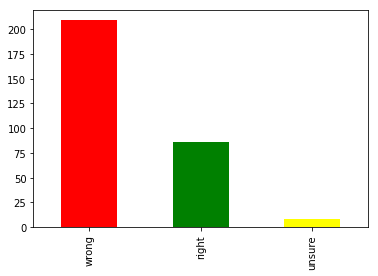

In [60]:
ratios = give_result_global_info(result)

## Wrong Ratio, Right Ratio, Unsure Ratio

#### 其中， 102个问题， 3个模型， 结果总体为 68.98% 错误, 23.38% 正确， 2.6% 未知

## 分模型分析

In [35]:
dssm_result = result[result.model == 'dssm']

wrong: 98.01980198019803%
right: 1.9801980198019802%
unsure: 0.0%


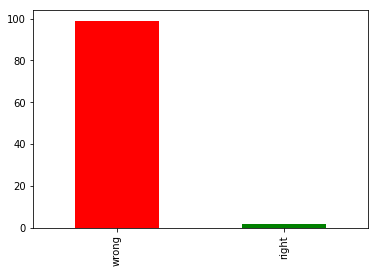

In [36]:
ratios_d = give_result_global_info(dssm_result)

wrong: 76.23762376237624%
right: 19.801980198019802%
unsure: 3.9603960396039604%


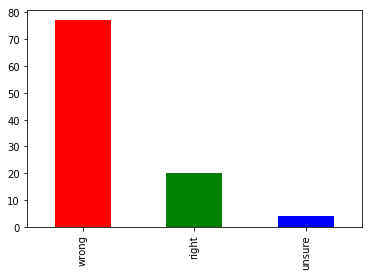

In [37]:
tfidf = result[result.model == 'tfidf']
ratios_t = give_result_global_info(tfidf)

wrong: 32.67326732673268%
right: 63.366336633663366%
unsure: 3.9603960396039604%


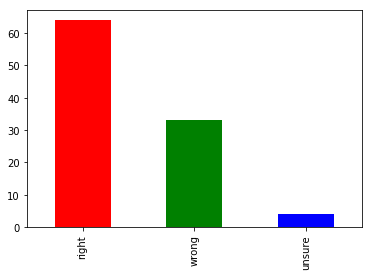

In [38]:
topic = result[result.model == 'topic']
ratios_tp = give_result_global_info(topic)

### 错误、正确结果分模型分析

In [39]:
dssm_result[dssm_result['right'] == 'right']

,input,model,top0,top1,top10,top11,top12,top13,top14,top15,...,top19,top2,top3,top4,top5,top6,top7,top8,top9,right
22,大额存单的最低起购金额,dssm,什么是“悦生活”,“悦生活”的网址,什么是保险类别？,保险类别,如何注销龙商户,如何注销电话银行,注销电话银行,手机银行怎样注销,...,注销手机银行,实物金价格表,实物金价目表,快捷支付注销,后退,手机银行咋个注销,如何注销龙支付,保险类别有哪些,保险类别是什么,right
40,财富贷有什么用,dssm,“悦生活”的网址,什么是“悦生活”,准贷记卡有哪几种,下载安装手机银行手机银行,感激涕零,手机银行一半怎样下载安装,什么是财富卡,什么是套算汇率,...,怎么下载安装手机银行,保险类别有哪些,保险类别是什么,保险类别,什么是保险类别？,实物金价格表,实物金价目表,财富贷,财富之星是什么,right


In [40]:
tfidf[tfidf['right'] == 'right'].sample(10)

,input,model,top0,top1,top10,top11,top12,top13,top14,top15,...,top19,top2,top3,top4,top5,top6,top7,top8,top9,right
107,个人网银申请借记卡功能说明,tfidf,个人网银申请龙卡E付卡,个人网银申请退保,个人网银申请储蓄卡,网银办理个人业务预约说明,个人网银购房规划功能操作步骤,个人网银定制首页常用功能,个人网银功能,个人网银签约借贷通功能条件,...,个人网银账户功能设置,个人网银咋样申请退保,个人网银咋个申请退保,个人网银申请快贷业务,通过个人网银申请信贷,个人网银申请信用卡损坏换卡,个人网银申请信用卡分期,个人网银使用说明,个人网银申请信用卡,right
29,PAD银行账户查询功能说明,tfidf,PAD银行信用卡还款查询功能说明,PAD银行账户查询功能,短信银行查询交易明细,发短信查询短信银行是否欠费,银行联行号查询,PAD银行账户查询内容,PAD银行悦生活缴费说明,微信银行查询周边网点功能说明,...,PAD银行查询账户类型,微信银行查询账户明细功能说明,查询短信银行功能,PAD银行中的悦生活说明,银行支票说明,查询银行联行号,短信银行免费试用期说明,查询外汇汇款银行SWIFTCODE,PAD银行注意说明,right
248,办理信用卡自动还款的方法说明,tfidf,信用卡办理分期还款方法,信用卡分期办理方法,信用卡超额还款说明,定活两便转活期存款办理方法,信用卡外币欠款还款方法,银联缴费办理方法,维护信用卡约定还款账户方法,大额存单质押贷款办理方法,...,办理信用卡自动还款,信用卡附卡开卡方法说明,手机银行办理信用卡方法,信用卡还款方法,办理信用卡外币账户还款,客户了解信用卡活动方法,该办理信用卡积分商户兑换,定活两便转定期存款办理方法,信用卡境外交易办理退税,right
26,PAD银行账户怎样查询,tfidf,短信银行查询交易明细,银行联行号查询,PAD银行查询账户类型,查询银行存贷款利率,PAD银行账户查询操作,PAD银行账户可否查询内容,PAD银行账户能不能查询内容,能用PAD银行账户查询内容,...,银行本票提示付款时间,查询银行联行号,查询外汇汇款银行SWIFTCODE,PAD银行账户查询内容,发短信查询短信银行是否欠费,PAD银行账户查询功能,查询短信银行功能,PAD银行信用卡还款查询,PAD银行查询定期存款方式,right
242,有没有信用卡自动还款,tfidf,美元还款信用卡,龙卡人民币信用卡澳大利亚地区客服电话,信用卡免息期计算,信用卡特殊之处,信用卡销户是否退还溢缴款,信用卡网上交易时应注意些,信用卡消费时间入账,信用卡到期更换后密码会变动,...,信用卡何时会收到退款,ATMCRS还信用卡入账多久,ATMCRS还信用卡多久入账,注册为信用卡网站实名客户享受便利,电话银行信用卡还款,ATMCRS还信用卡实时入账,ATMCRS信用卡还款入账时间,信用卡激活是否允许代办,信用卡具备优点,right
251,办理信用卡自动还款需要什么资料,tfidf,信用卡办理销户,信用卡办理条件,信用卡网站办理账单分期,办理信用卡现金还款,办理信用卡电子现金圈存圈提,信用卡分期办理,发短信办理信用卡账单分期,信用卡账单分期办理条件,...,电话银行办理信用卡还款,该办理信用卡积分商户兑换,信用卡办理分期还款,办理信用卡自动还款,信用卡办理账单分期优惠,柜面办理信用卡现金还款,短信办理信用卡账单分期,上海银行短信信用卡还款到柜面办理签约,打印信用卡明细办理资料,right
227,个人网银在线申请信用卡功能说明,tfidf,个人网银申请信用卡分期,个人网银申请信用卡损坏换卡,个人网银维护信用卡约定还款账户,个人网银为信用卡还款,个人网银进行信用卡免验密设置,个人网银进行信用卡开卡,个人网银申请快贷业务,个人网银进行信用卡开卡几次机会,...,开通信用卡主卡个人网银,个人网银申请信用卡,个人网银查询信用卡申请进度,个人网银归还信用卡外币欠款,个人网银申请龙卡E付卡,个人网银咋个申请退保,个人网银申请退保,个人网银修改信用卡账单地址,个人网银咋样申请退保,right
197,网银怎样查询贷款信息,tfidf,网银查询账号,网银查询账户明细,查询网银自助购汇还款,网银查询贷款信息,网银提前还款进度查询,网银查询公积金账户,咋个查询网银交易明细,网银中他行授权建行查询签约,...,网银黄金交易型开放式指数基金交易明细查询,网银基金客户历史交易明细查询,网银查询账户余额,查询修改网银签约手机号码,查询网银绑定手机号码,网银查询修改撤消黄金定投计划,查询网银交易明细操作步骤,查询网银交易明细,查询网银证书是否过期,right
110,手机银行能否申请借记卡,tfidf,手机银行申请,申请手机银行,手机银行能不能申请贷款,手机银行申请信用卡分期,手机银行申请贷款方法,手机银行申请贷款流程,在手机银行申请贷款,手机银行主要用来干嘛,...,手机银行撤消基金定投协议,手机银行申请贷款,手机银行申请退保,手机银行申请贷款操作步骤,手机银行申请快贷业务,通过手机银行申请贷款,手机银行申请信用卡,手机银行申请办法,手机银行申请储蓄卡,right
188,注销PAD银行的途径有哪些,tfidf,改接收银行短信手机号码,贵州客户接收外汇汇入汇款向汇款银行提供信息,注销PAD银行,PAD银行保证安全,广东客户接收外汇汇入汇款向汇款银行提供信息,PAD银行安全性问题,补缴短信银行服务费,短信银行释义,...,PAD银行查看定期存款,青海客户接收外汇汇入汇款向汇款银行提供信息,PAD银行看不到定期存款,短信银行欠费宽限期内是否会自动补扣,鑫存管证券转银行银转证,银行本票提示付款时间,银行外汇牌价,PAD银行特点,银行余额,right


In [73]:
topic[topic['right'] == 'wrong'].sample(10)

,input,model,top0,top1,top10,top11,top12,top13,top14,top15,...,top19,top2,top3,top4,top5,top6,top7,top8,top9,right
252,怎样查看留学贷款地点,topic,我如何查看人民币存贷款利率和外汇牌价,商业贷款扣款前怎么提示我,发短信如何查询个人贷款利率,如何查询我贷款的还款情况,办贷款时留的联系电话怎么修改,网银贷款申请的种类有哪些,如何查询个人商业住房贷款剩余还款期限,商业贷款扣款会发短信吗,...,如何发短信查询结售汇的参考牌价,我在建行没有贷款，也可以做试算吗？,贷款还款计划表和已还明细如何打印,网上银行的个人贷款查询受时间限制吗？,我想近期提前归还贷款，应如何进行试算？,如何查询贷款行的联系电话,商业贷款扣款前会提示我吗？,个人网银如何进行贷款试算,我想在境内支取外币现金，需要提供什么资料,wrong
294,零存整取的存款证明手续费是怎么计算的,topic,境外取款的手续费是怎么计算的,账单分期的手续费是怎么计算的,借记卡境外取款手续费怎么计算,借记卡境外取款怎么计算手续费,零存整取提前支取利息如何计算,外币存款利息如何进行计算,购车分期手续费怎么计算，如何收取？,大额存单提前支取利息计算标准是不变的吗,...,AA收款游客短信付款的手续费是如何计算的？,零存整取提前取款的利息怎么计算,零存整取提前支取的话利息是如何计算的,境外取款手续费的计算规则是什么,如何计算零存整取提前支取的利息,整存整取的存期如何计算,手续费怎么计算，如何收取？,零存整取提前支取，利息的计算方式,定活两便的利息怎么计算,wrong
0,财富之星额度会倾斜吗,topic,什么是固定额度和临时额度,固定额度和临时额度是指啥,附卡额度可以单独设置吗？,如何提高限额,信用卡临时额度与固定额度的区别,信用卡分期后额度会降低吗,我要调整临时额度,信用卡额度是不能改变的吗,...,信用卡的额度能提高吗,为什么申请的额度与最终调整的额度不一致,为什么申请的额度与最终调整的额度不一致？,固定额度和临时额度的区别,什么是临时额度？,固定额度和临时额度介绍,固定额度和临时额度,临时额度与永久额度的区别,信用卡的额度能降低吗,wrong
90,“蓝豹百大”龙卡联名卡贵宾卡的有效期,topic,“庄胜崇光百货龙卡”的有效期,“蓝豹百大”龙卡联名卡的有效期,蓝豹百大龙卡联名卡贵宾卡收取手续费吗,蓝豹百大贵宾卡有年费吗,蓝豹百大龙卡联名卡贵宾卡手续费的收取方式,“蓝豹·百大”龙卡联名卡贵宾卡能否在异地使用,“庄胜崇光百货龙卡”如何区分金卡与银卡,“文峰龙卡”联名卡可享受哪些权益,...,什么是联名借记卡-国泰君安龙卡,“蓝豹·百大”龙卡联名卡的有效期,蓝豹百大贵宾龙卡相关费用说明,“蓝豹百大”龙卡联名卡贵宾卡的管理费用,蓝豹百大龙卡联名卡贵宾卡相关手续费,非“蓝豹”LAMPO、常州百大公司会员客户如何办理“蓝豹·百大”龙卡联名卡,“蓝豹·百大”龙卡联名卡贵宾卡收取哪些管理费用,蓝豹百大龙卡联名卡贵宾卡手续费如何收取,蓝豹百大龙卡联名卡贵宾卡如何收取手续费,wrong
114,手机银行申请借记卡方法,topic,个人网银申请借记卡,借记卡（普通版）申请方法,借记卡的激活方法,已有建行借记卡是否可以再次申请,借记卡挂失解挂方法,借记卡如何销卡,储蓄卡初始密码修改,网上怎样申请借记卡,...,网上申请借记卡,网上怎么申请借记卡,网上如何申请借记卡,储蓄卡如何开通个人网上银行,如何通过网银实现储蓄卡给信用卡还款,储蓄卡通过网银怎么给信用卡还款,网银操作储蓄卡转账还信用卡,如何修改储蓄卡的初始密码,已有建行卡能再申请借记卡吗,wrong
78,“蓝豹百大”龙卡联名卡是借记卡还是信用卡,topic,什么是联名借记卡-国泰君安龙卡,什么是联名借记卡-支付宝龙卡,龙卡IC信用卡的工本费是多少,借记卡与贷记卡的区别,什么是“龙卡EMV信用卡”,什么是龙卡JOY信用卡,云闪付龙卡借记卡交易有额度限制吗,龙卡IC信用卡的挂失费是多少,...,信用卡联名卡退市说明,联名借记卡-支付宝龙卡的作用,联名借记卡-国泰君安龙卡的作用,联名借记卡-国泰君安龙卡的含义,联名借记卡-国泰君安龙卡,联名借记卡-国泰君安龙卡介绍,联名借记卡-支付宝龙卡,联名借记卡-支付宝龙卡的客户群,联名借记卡-国泰君安龙卡简介,wrong
45,财富贷客户群,topic,信用卡怎么提额或者降额,陆港通龙卡有哪几种,乐当家理财卡（金卡/白金卡）如何选号,乐当家理财卡（金卡/白金卡）怎么选号,乐当家理财卡（金卡/白金卡）选号功能,乐当家理财卡（金卡/白金卡）能否选号,什么是陆港通龙卡的建行（亚洲）电话银行号码,“陆港通龙卡”有哪些种类,...,乐当家理财卡（金卡/白金卡）选号规则,银行卡一年没用了能收到转钱吗,乐当家理财卡（金卡/白金卡）是否有配套存折,提示“0250B2114014客户信息不存在”是什么意思,陆港通龙卡,什么是乐当家理财卡一卡多账户功能,乐当家理财卡（金卡/白金卡）的卡面颜色,陆港通龙卡的种类,出现错误代码“0690E1133002”怎么办,wrong
297,零存整取的存款证明资费标准,topic,国债的手续费资费标准,挂失资费标准,我的白金卡是银联单币种卡，升级后是否也具备自动购汇及免收外汇兑换手续费？,大额存单提前支取利息计算标准是不变的吗,开立存折收费标准,原来已经开立的借记卡和活期存折，分类后算做几类账户,外币存款利率的查询方法,补打存折的交易明细是否收取手续费,...,境外ATM查询资费标准,换折的资费情况,存折取款的收费标准,借记卡资费情况,银联在线网上跨行还款手续费资费标准,零存整取存单销户有哪些方式,零存整取存单销户的方式,零存整取存单销户的步骤,零存整取存单销户的具体操作,wrong
300,在东北方言中“贼漂亮”的“贼”是什么意思？,topic,借记卡很久没用了，如何确定是好的还是坏的,里面有啥好玩的,我是（一代/二代）网银盾或者通用盾用户，有什么方法可以转账的时候不需要用盾呢？,黄金积存是什么意思,你最喜欢金总唱的哪首歌,聚财有什么要注意的吗,境内个人是指什么意思,我可以设置特殊符号的别名吗？,...,“授业无忧”方案的主要内容是什么？,什么是“南商龙卡”,为什么我的地区与天气总显示在北京？,可玩的多不多,你的芳龄是多少,金总的歌你最喜欢哪一首,咋还没叫到我的号,所有龙卡通的有效期都是一样的吗,我的VISA卡掉在国外了,wrong
231,怎样使用电话银行缴水电费,topic,网银如何缴水电费,网银怎么缴水电费,网银缴有线电视费的操作步骤,我在柜台办理了贵行的短信转账汇款、缴费充值、基金短信服务，会收到成功开通服务提醒短信吗？,自助设备转账手续费如何收取,信用卡能否代扣水电煤气费,使用建行自助设备修改账户密码是否收取手续费,到柜台设定ATM自助转账限额能否他人代办,...,智慧柜员机上代办修改转账限额的操作步骤,网银缴水电费,网银缴话费的操作步骤,信用卡具备缴纳手机费、电话费、水费、电费、有线电视费等费用的功能吗？,如何代收水电费,我在柜台缴服务费成功了，可以再补打缴费凭证吗？,我的短信服务欠费了，可以在柜台补缴服务费吗？,使用建行自助设备打印对账单是否收取手续费,网银缴话费,wrong


In [75]:
topic[topic['right'] == 'right'].to_csv('result-tst-golbal-right.csv')

In [74]:
topic[topic['right'] == 'wrong'].values

array([['财富之星额度会倾斜吗', 'topic', '什么是固定额度和临时额度', '固定额度和临时额度是指啥',
        '附卡额度可以单独设置吗？', '如何提高限额', '信用卡临时额度与固定额度的区别', '信用卡分期后额度会降低吗',
        '我要调整临时额度', '信用卡额度是不能改变的吗', '怎么调整固定额度', '我信用卡额度是固定的吗',
        '可以申请降低信用卡额度吗', '信用卡的额度能提高吗', '为什么申请的额度与最终调整的额度不一致',
        '为什么申请的额度与最终调整的额度不一致？', '固定额度和临时额度的区别', '什么是临时额度？',
        '固定额度和临时额度介绍', '固定额度和临时额度', '临时额度与永久额度的区别', '信用卡的额度能降低吗',
        'wrong'],
       ['大额存单的起购金额是多少', 'topic', '乐当家理财卡（金卡/白金卡）是否有配套存折',
        '乐当家理财卡（金卡/白金卡）可以存入哪些类型的存款', 'VISA卡与万事达卡的区别',
        '乐当家理财卡（金卡/白金卡）取款密码的有多少位', 'VISA卡与万事达卡有什么不同', '乐当家理财卡是否有配套存折',
        '陆港通龙卡的种类有哪些？', '陆港通龙卡有多少种类', '什么是乐当家理财卡（金卡/白金卡）选号功能',
        '乐当家理财卡（金卡/白金卡）在到期换卡期间能否继续使用', '什么是乐当家理财卡一卡多账户功能', '个人“质押贷”支用方式',
        '陆港通龙卡有哪几种', 'VISA卡与万事达卡的差别是什么', '乐当家理财卡（金卡/白金卡）的卡号有多少位',
        '什么是速盈的“未付收益”', '“陆港通龙卡”能否带存折（卡折并用）', '乐当家理财卡有配套存折吗',
        '什么是个人汽车贷款的利率', '陆港通龙卡的种类是什么', 'wrong'],
       ['大额存单的起购金额说明', 'topic', '乐当家理财卡（金卡/白金卡）是否有配套存折', '陆港通龙卡有哪几种',
        '什么是速盈的“未付收益”', '“陆港通龙卡”能

In [41]:
topic[topic['right'] == 'right'].sample(10)

,input,model,top0,top1,top10,top11,top12,top13,top14,top15,...,top19,top2,top3,top4,top5,top6,top7,top8,top9,right
123,口头/临时挂失的方法,topic,修改初始密码的方法,挂失解冻的方法,通过短信挂失的话，是属于哪种挂失方式？,VISA卡的使用方法,修改/重置龙支付密码的方法,定活两便转理财的方法,电子渠道不动户激活的方法,临时额度的调整方法,...,退保的方法,取消挂失（解挂）的方法,账单分期的申请方法有哪些？,怎么进行口头挂失,修改初始密码的方式,我每次转账的时候都要回复输入确认码来确认，很麻烦，有没更简洁的回复方式来完成付款？,易存金的定义,什么是附加码,借记卡综合积分的使用方法,right
240,有没有信用卡自动还款,topic,信用卡自动还款的介绍,信用卡自动购汇还款,信用卡非现金还款,信用卡还款,有哪些信用卡还款方式,信用卡还款逾期了,信用卡什么时候还款,信用卡还款日,...,什么是信用卡“一键还款”,签约信用卡自动还款,信用卡还款小贴士,信用卡自动转账/自动购汇还款,信用卡怎么还款,如何给信用卡还款,信用卡如何还款,信用卡还款方式,信用卡自动转账购汇还款,right
93,“蓝豹百大”龙卡联名卡使用年限,topic,蓝豹百大贵宾龙卡相关费用说明,非“蓝豹”LAMPO、常州百大公司会员客户如何办理“蓝豹·百大”龙卡联名卡,“庄胜崇光百货龙卡”的有效期,“庄胜崇光百货龙卡”如何区分金卡与银卡,蓝豹百大龙卡联名卡介绍,“蓝豹百大”龙卡联名卡的申请条件,蓝豹百大龙卡联名卡贵宾卡手续费如何收取,蓝豹百大龙卡联名卡贵宾卡如何收取手续费,...,“蓝豹百大”龙卡联名卡能干什么,“蓝豹·百大”龙卡联名卡的有效期,“蓝豹百大”龙卡联名卡的有效期,“文峰龙卡”联名卡可享受哪些权益,“蓝豹百大”龙卡联名卡贵宾卡的管理费用,“蓝豹·百大”龙卡联名卡贵宾卡收取哪些管理费用,蓝豹百大龙卡联名卡贵宾卡相关手续费,蓝豹百大贵宾卡有年费吗,“蓝豹·百大”龙卡联名卡贵宾卡能否在异地使用,right
204,能否使用在线网银缴保费,topic,在线网银缴保费,能否使用非签约账户通过网上银行进行网上支付,网上银行待缴话费,网银怎么缴水电费,网银如何缴水电费,如何通过网银修改网上支付限额,网上支付后可否到柜台打印发票？,注销网上银行后，“快捷付”功能能否正常使用,...,什么是“网上银行支付”,网银缴话费的操作步骤,如何在个人网银缴纳保费,个人网银如何缴纳保费,个人网银缴费支付能否打印回单,暂停或注销网银后，能否继续进行网上支付,有哪些网银支付方式,网银转账退款问题是什么,网银缴话费,right
222,在线申请信用卡的方法,topic,网上如何申请信用卡,在线申请信用卡,信用卡还款的方法有哪些,信用卡网站如何进行信用卡开卡,网络申请信用卡可以申请哪些卡种,申请信用卡需要的资料,查询信用卡的申请进度的方式,信用卡的申请进度查询方式,...,客户了解信用卡活动的方法,查询信用卡的申请进度的方法,停用信用卡的方法,怎么在网上还信用卡,网上如何申请信用卡消费分期,信用卡账单分期的申请方法,通过信用卡网站申请办卡需要多少时间？,哪些客户可以在网上申请信用卡,如何通过信用卡网站查询信用卡申办进度？,right
225,个人网银在线申请信用卡功能说明,topic,个人网银如何申请信用卡,个人网银如何申请信用卡分期,如何通过个人网银为他行信用卡还款,通过个人网银怎么为他行信用卡还款,怎么通过个人网银为他行信用卡还款,个人网银如何查询信用卡额度,个人网银如何为信用卡还款,个人网银如何查询信用卡账单,...,个人网银如何挂失信用卡,个人网银如何查询信用卡申请进度,个人网银如何进行信用卡开卡,使用信用卡注册个人网上银行的条件,个人网银如何申请信用卡损坏换卡,个人网银进行信用卡开卡有几次机会,个人网银查询信用卡账单的方法,个人网银如何进行信用卡免验密设置,通过个人网银如何为他行信用卡还款,right
219,怎样在线申请信用卡,topic,网上如何申请信用卡,在线申请信用卡,如何通过信用卡网站查询信用卡申办进度？,怎么在网上还信用卡,信用卡申请资料,什么是信用卡网上还款,可以在网上申办信用卡吗,申请信用卡有什么要求,...,我可以申请信用卡吗,怎样申请信用卡,如何申请信用卡,网上如何申请信用卡消费分期,申请信用卡,信用卡申请,信用卡网站如何进行信用卡开卡,如何在网上挂失信用卡？,如何中止申请信用卡,right
153,办理活期转定期需要排队吗,topic,在哪里办理活期转定期,活期转定期怎么办理,定活两便转定期存款怎么办理,外币能否办理定期与活期的互转,ATM办理活期转定期,定活两便转活期存款办理,咋办理定活两便转活期,办理定期定期自动转,...,定活两便可以在哪些渠道办理转定期存款,怎样在线办理活期转定期,办理活期转定期,在线办理活期转定期操作步骤,如何办理活期存款转为定期存款,如何办理定期与活期互转,定活两便转活期存款怎么办理,怎么办理定活两便转活期存款？,怎么办理定活两便转定期存款？,right
273,境外银行汇款汇到哪里,topic,智易通转账汇款的到账时间,我得借记卡挺长时间没用了能收到汇款吗,什么是境外汇入汇款的票汇,外汇汇款汇出,如何查询汇出的外汇汇款,外汇怎么汇款,外汇汇款有哪些种类,有哪几类外汇汇款,...,外汇电汇汇出汇款手续费,境外汇入汇款有哪些汇款类型,境外汇出汇款有哪些汇款类型,什么是汇款解付,什么是境外汇入汇款,什么是境外电汇汇入汇款,什么是境外汇出汇款,汇入汇款解付时能否代办,外汇汇款汇入,right
84,“蓝豹百大”龙卡联名卡的有效期是多久,topic,“蓝豹百大”龙卡联名卡的有效期,“蓝豹·百大”龙卡联名卡的有效期,“蓝豹百大”龙卡联名卡贵宾卡的管理费用,蓝豹百大龙卡联名卡贵宾卡相关手续费,“庄胜崇光百货龙卡”如何区分金卡与银卡,“蓝豹·百大”龙卡联名卡贵宾卡能否在异地使用,“长安龙卡”的有效期,联名借记卡-国泰君安龙卡的含义,...,联名借记卡-国泰君安龙卡的作用,“庄胜崇光百货龙卡”的有效期,蓝豹百大贵宾龙卡相关费用说明,非“蓝豹”LAMPO、常州百大公司会员客户如何办理“蓝豹·百大”龙卡联名卡,上戏龙卡卡片有效期多久,“文峰龙卡”联名卡可享受哪些权益,清华龙卡卡片有效期多久,蓝豹百大贵宾卡有年费吗,“华联龙卡”的有效期,right


## 组合模型分析

组合模型指并行 每个模型选出的20句话组成40句中有正确的情况则为right

In [42]:
from itertools import permutations

In [43]:
def get_comb_val(c1, c2):
    values = {'right': 2, 'unsure': 1, 'wrong':0}
    return max(c1, c2, key=lambda c: values[c])

In [44]:
def parallel(tfidf,topic):
    topic_tfidf = {}
    topic_tfidf['right'] = [get_comb_val(tfidf.iloc[i]['right'], topic.iloc[i]['right']) for i in range(len(tfidf))]
    topic_tfidf = pd.DataFrame(topic_tfidf)
    return topic_tfidf

wrong: 31.683168316831683%
right: 64.35643564356435%
unsure: 3.9603960396039604%


['wrong', 'right', 'unsure']

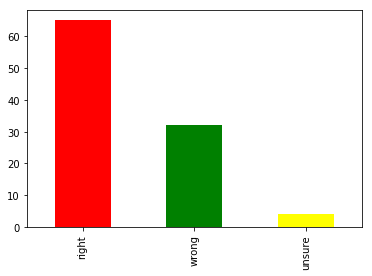

In [61]:
topic_tfidf = parallel(tfidf,topic)
give_result_global_info(topic_tfidf)

wrong: 30.693069306930692%
right: 65.34653465346535%
unsure: 3.9603960396039604%


['wrong', 'right', 'unsure']

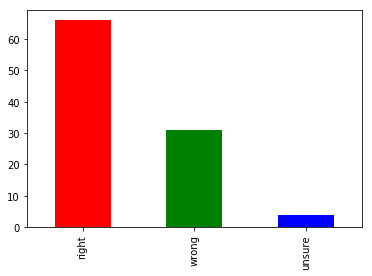

In [46]:
topic_dssm = parallel(dssm_result,topic)
give_result_global_info(topic_dssm)